<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
#код в ссылке https://gist.github.com/fuwiak/9c695b51c33b2e052c5a721383705a9c
#код с ссылки запускаем так(BASH) python3 hh_parser.py
import requests
import pandas as pd

number_of_pages = 100
#number_of_ads = number_of_pages * per_page

job_title = ['data engineer']

for job in job_title:
    data=[]

    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {
            'text': job, 
            'area': '113',
            'per_page': '10', 
            'page': i,
            'schedule': 'remote'} # удаленка
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        
        df = pd.DataFrame(columns = list(vacancy_details))
        
        ind = 0
        
        for i in range(len(data)):
            
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    
#     csv_name = job+".csv"
    csv_name = 'DE.csv'
    
    df.to_csv(csv_name)

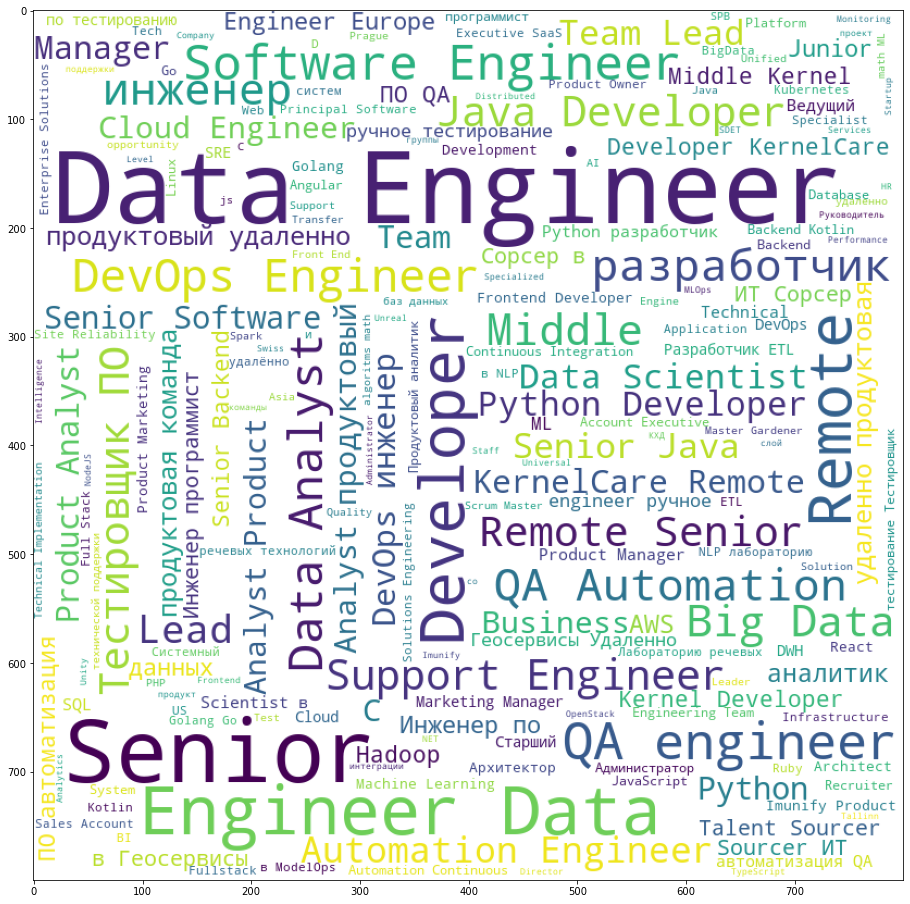

In [2]:
# графика

from collections import Counter

vacancy_names = df['name'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += x + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DE.png')

In [4]:
def json_from(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['from']

def json_to(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['to']

def df_type(x):
    return type(x)

def json_currency(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['currency']

def requirement(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['requirement']

def responsibility(x):
    if str(type(x)) == "<class 'NoneType'>":
        return None
    return x['responsibility']

def name(x):
    x = x.lower()
    if 'analyst' in x or 'аналитик' in x:
        return 'analyst'
    elif 'engineer' in x:
        return 'engineer'
    elif 'scientist' in x:
        return 'scientist'
    elif 'developer' in x:
        return 'developer'
    return None

In [5]:
# df_new.drop(df_new.index, inplace=True)
df_new = pd.DataFrame() 
df_new['name'] = df['name']
df_new['name_short'] = df['name'].apply(name)
df_new['alternate_url'] = df['alternate_url']
df_new['from'] = df['salary'].apply(json_from)
df_new['to'] = df['salary'].apply(json_to)
df_new['currency'] = df['salary'].apply(json_currency)
df_new['requirement'] = df['snippet'].apply(requirement)
df_new['responsibility'] = df['snippet'].apply(responsibility)
# df_new['Analyst'] = df['name'].apply(name_Analyst)
# df_new['Engineer'] = df['name'].apply(name_Engineer)
# df_new['Scientist'] = df['name'].apply(name_Scientist)
# df_new['Developer'] = df['name'].apply(name_Developer)

In [6]:
pd.pivot_table(df_new,
               index = ['name_short', 'currency'], 
               values = ['from', 'to'],
               aggfunc = ['max', 'min', 'mean', 'count'])

max                min                     mean  \
                         from        to     from        to           from   
name_short currency                                                         
analyst    RUR       200000.0  400000.0  80000.0  100000.0  144285.714286   
           USD         2500.0    6000.0   1000.0    2000.0    1968.750000   
developer  RUR       300000.0  400000.0  80000.0  220000.0  183750.000000   
           USD         6500.0   12000.0   1000.0    2000.0    4475.000000   
engineer   EUR         4500.0    4500.0   2500.0    2500.0    3722.222222   
           RUR       320000.0  600000.0  50000.0  100000.0  138060.000000   
           USD         8000.0   12500.0   1500.0    2500.0    4591.666667   
scientist  RUR       300000.0  200000.0  90000.0  200000.0  195000.000000   

                                   count      
                                to  from  to  
name_short currency                           
analyst    RUR       230000.000000    14  13  
           USD         4000.000000    16   2  
developer  RUR       335000.000000     8   6  
           USD         6400.000000    24  15  
engineer   EUR         4000.000000     9   5  
           RUR       311636.363636    50  22  
           USD         6767.857143    36  28  
scientist  RUR       200000.000000     2   1

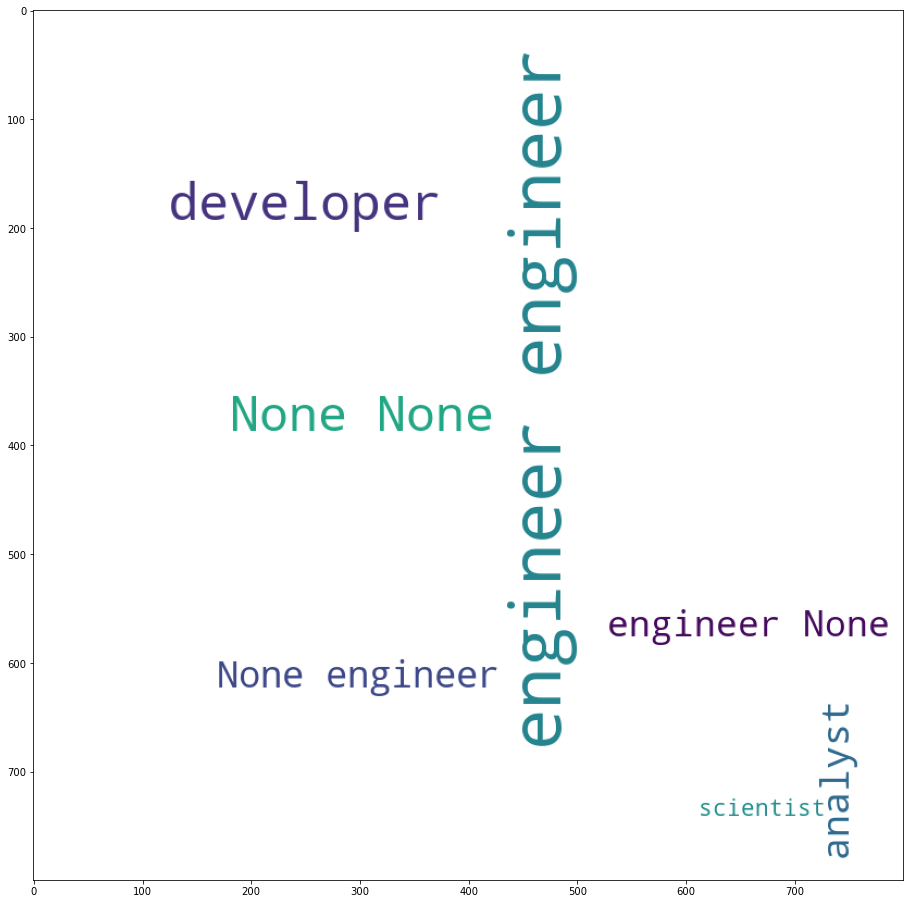

In [7]:
vacancy_names = df_new['name_short'] # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
cloud = ''
for x in list(vacancy_names):
    cloud += str(x) + ' '
wordcloud = WordCloud(width = 800, height = 800, 

                stopwords = stopwords, 
                min_font_size = 8,background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (16, 16)) 
plt.imshow(wordcloud)
plt.savefig('DE_short.png')

In [8]:
analitic = list(df_new.groupby(['name']).count().sort_values('name_short', ascending=False).head().index)
df_new.groupby(['name']).count().sort_values('name_short', ascending=False).head()
analitic

['Data Engineer',
 'Data Analyst / Product Analyst (продуктовый, удаленно, продуктовая команда)',
 'Senior Data Engineer',
 'Cloud Engineer (Europe)',
 'Support Engineer']

In [9]:
df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,50812636,False,Data Engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50812636,[],"{'id': '4330957', 'name': 'Фином Технологии', ...",{'requirement': 'Опыт работы с СУБД (PostgreSQ...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True
1,49130051,False,Data Engineer/ETL Developer,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 4000, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/49130051,[],"{'id': '3194188', 'name': 'Globus.ai', 'url': ...",{'requirement': 'От 5 лет опыта объектно-ориен...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,50815233,False,Junior Business Intelligence Analyst,None,True,True,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 1000, 'to': 2000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50815233,[],"{'id': '2918899', 'name': 'Inca Digital', 'url...",{'requirement': 'Tools. - Fluent English. We a...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",True
3,50806691,False,Data Scientist ML/AI Engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 8000, 'to': None, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50806691,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Advanced SQL skills. - Think ...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True
4,48095633,False,Data engineer (удаленно),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48095633,[],"{'id': '4934', 'name': 'Билайн', 'url': 'https...","{'requirement': 'Интересуется Flink, пробовал ...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,50191521,False,Influence marketing manager (Xoxo),"{'id': 'sdv-9849-sdv', 'name': 'Social Discove...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50191521,[],"{'id': '9849', 'name': 'Social Discovery Ventu...",{'requirement': '1 years of experience managin...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True
698,50223937,False,"Manager, GRC (Governance, Risk and Compliance)",None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50223937,[],"{'id': '163092', 'name': 'НПАО Сильвамо Корпор...",{'requirement': 'Bachelor’s Degree in Informat...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
699,50222391,False,IT Business Consultant (Manufacturing Support ...,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50222391,[],"{'id': '163092', 'name': 'НПАО Сильвамо Корпор...",{'requirement': 'Knowledge of Machine Learning...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
700,50226892,False,Senior Fullstack Developer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 4500, 'to': None, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/50226892,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Experience with: PostgreSQL (...,None,"{'id': 'remot